In [1]:
#So first we need to find as many possible matches between two images to find the fundamental matrix. 
#For this, we use SIFT descriptors with FLANN based matcher and ratio test.
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread('myleft.jpg',0)  #queryimage # left image
img2 = cv.imread('myright.jpg',0) #trainimage # right image
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN (Fast Library for Approximate Nearest Neighbors) parameters (two dictionaries)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)  # which algorithm are going use
# search within the tree
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
pts1 = []
pts2 = []
# append the points according to distance of descriptors and creating index for img 1 & img2
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

In [2]:
# we find the epilines. Epilines corresponding to the points in first image is drawn on second image.
#So mentioning of correct images are important here. We get an array of lines. 
#So we define a new function to draw these lines on the images.
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

In [3]:
#Now we have the list of best matches from both the images. Let's find the Fundamental Matrix.
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS) # least median N>=8
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [4]:
pts2

array([[170, 144],
       [170, 144],
       [171, 218],
       [179, 219],
       [185, 246],
       [189, 165],
       [186, 240],
       [194, 182],
       [195, 142],
       [193, 214],
       [194, 238],
       [194, 238],
       [198, 164],
       [195, 228],
       [195, 224],
       [198, 195],
       [197, 217],
       [197, 255],
       [197, 255],
       [203, 163],
       [204, 155],
       [205, 146],
       [202, 215],
       [207, 162],
       [207, 162],
       [210, 155],
       [211, 162],
       [207, 228],
       [204, 320],
       [217, 157],
       [215, 202],
       [217, 150],
       [212, 250],
       [217, 157],
       [213, 265],
       [219, 153],
       [219, 161],
       [215, 247],
       [221, 169],
       [218, 223],
       [213, 321],
       [207, 162],
       [225, 154],
       [225, 154],
       [221, 224],
       [221, 224],
       [223, 197],
       [223, 197],
       [228, 160],
       [229, 143],
       [217, 354],
       [231, 174],
       [224,

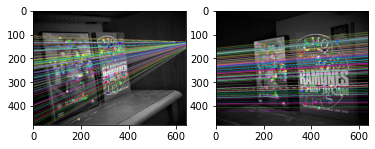

In [5]:
#Now we find the epilines in both the images and draw them.
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()